# Data Analytics

## Importing Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from io import StringIO
import os

print(os.getcwd())

/Users/javian/TheCode/Housing-Price-Time-Series-Forecasting


## Check out Datasets

In [64]:
from io import StringIO
import pandas as pd

def print_table(df, year):
    print(f"Domestic Interest Rates {year}:")
    print(df)

def process_csv(filename):
    global df
    with open(filename) as file:
        lines = file.readlines()

    # Print lines 1, 3, and 4
    for i in [0, 2, 3]:
        print(lines[i], end='')
        
    print('\n')

    # Initialize list to store dataframes
    dfs_by_year = {}

    # Process remaining lines
    start_index = 5  # Assuming the table starts from line 5
    table_start = start_index
    for i in range(start_index, len(lines)):
        if lines[i].strip() == '' and lines[i+1].strip() == '':  # Detect two empty lines
            header_line = lines[i+2]
            table = ''.join(lines[table_start:i+2])
            df = pd.read_csv(StringIO(table))
            year = df.columns[0].split()[0]  # Extract the year from the first column header
            dfs_by_year[year] = df
            table_start = i + 3  # Set the next table starting index

    # Store the last table
    if table_start < len(lines):
        table = ''.join(lines[table_start:])
        df = pd.read_csv(StringIO(table))
        year = df.columns[0].split()[0]
        dfs_by_year[year] = df

    # Print and store tables for each year
    for year, df in dfs_by_year.items():
        print_table(df, year)
        # You can store the dataframe df here in any desired format or container
            
    globals()['df'] = df  # Update the global 'df'
    return dfs_by_year

# Provide the filename of the CSV file
filename = '/Users/javian/TheCode/Housing-Price-Time-Series-Forecasting/data/3M_SORA_rates_2005_2024.csv'
dfs_by_year = process_csv(filename)

MAS: Financial Database - Domestic Interest Rates
Domestic Interest Rates (Daily)
Jan 2004 to Mar 2024


Domestic Interest Rates SORA:
     SORA Value Date Unnamed: 1  Unnamed: 2 SORA Publication Date  \
0             2005.0        Jul           1           04 Jul 2005   
1                NaN        NaN           4           05 Jul 2005   
2                NaN        NaN           5           06 Jul 2005   
3                NaN        NaN           6           07 Jul 2005   
4                NaN        NaN           7           08 Jul 2005   
..               ...        ...         ...                   ...   
122              NaN        NaN          23           27 Dec 2005   
123              NaN        NaN          27           28 Dec 2005   
124              NaN        NaN          28           29 Dec 2005   
125              NaN        NaN          29           30 Dec 2005   
126              NaN        NaN          30           03 Jan 2006   

    Compound SORA - 3 month  
0     

In [66]:
print(df.head())

      *  Interbank (overnight, 1-week, 1-month, 2-month, 3-month, 6-month, 12-month)
0                        *  3-month commercial bills                                
1                              *  SGS Overnight Repo                                
2   Historical data for these rates will still be...                                
3   The Singapore Overnight Rate Average or SORA ...                                
4   The SORA Publication Date is the same date as...                                


In [ ]:
print(tables_by_year.keys())

In [ ]:
for key in range (2006, 2025):
    table = tables_by_year.get(str(key))
    for col in table.columns:
        table[col].fillna(table[col][0], inplace=True)
    print(table)
    

### Explore MRT Coodinates Dataset

In [5]:
filename = '/Users/javian/TheCode/Housing-Price-Time-Series-Forecasting/data/PointsOfInterest/mrt_coordinates_opening_dates.csv'
df_mrt_coordinates_opening_dates = pd.read_csv(filename).drop('Unnamed: 0', axis=1)

df_mrt_coordinates_opening_dates

,name,latitude,longitude,line,opening_date
0,Jurong East MRT Station,1.333295,103.742154,North South,5/11/1988
1,Bukit Batok MRT Station,1.349033,103.749567,North South,10/3/1990
2,Bukit Gombak MRT Station,1.358612,103.751791,North South,10/3/1990
3,Choa Chu Kang MRT Station,1.385363,103.744371,North South,10/3/1990
4,Yew Tee MRT Station,1.397476,103.747418,North South,10/2/1996
...,...,...,...,...,...
157,Outram Park MRT Station,1.279740,103.839513,Thomson–East Coast,13/11/2022
158,Maxwell MRT Station,1.280533,103.843884,Thomson–East Coast,13/11/2022
159,Shenton Way MRT Station,1.277717,103.850368,Thomson–East Coast,13/11/2022
160,Marina Bay MRT Station,1.276427,103.854598,Thomson–East Coast,13/11/2022


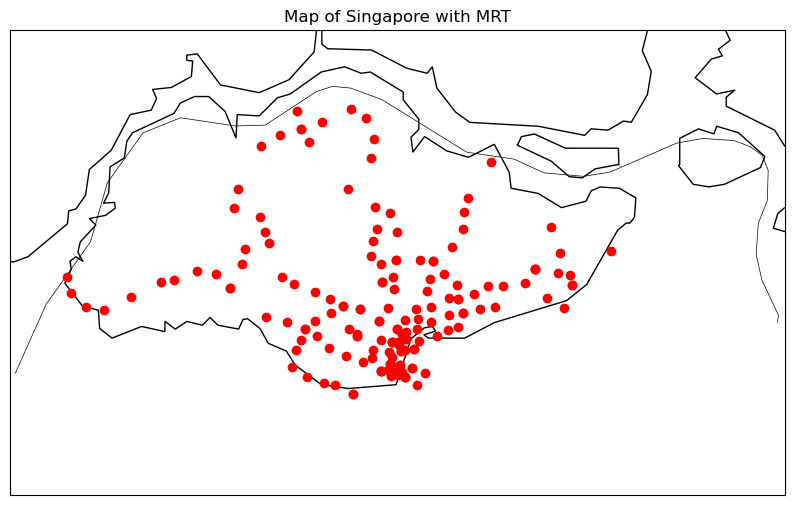

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(10, 8))
m = Basemap(projection='mill', llcrnrlat=1.2, urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104.1, resolution='h')
for index, row in df_mrt_coordinates_opening_dates.iterrows():
    name = row['name']
    lat = row['latitude']
    lon = row['longitude']
    x, y = m(lon, lat)
    m.scatter(x, y, marker='o', color='r', zorder=5)
m.drawcoastlines()
m.drawcountries()
plt.title('Map of Singapore with MRT')
plt.show()

### Check out Primary School Coordinates

In [8]:
filename = '/Users/javian/TheCode/Housing-Price-Time-Series-Forecasting/data/PointsOfInterest/primary_school_coordinates.csv'
df_primary_school_coordinates = pd.read_csv(filename).drop('Unnamed: 0', axis=1)

df_primary_school_coordinates

,name,SAP,GEP,Affiliated_Secondary,latitude,longitude
0,Admiralty Primary School,0,0,0,1.442635,103.800040
1,Ahmad Ibrahim Primary School,0,0,0,1.433153,103.832942
2,Ai Tong School,1,0,0,1.360583,103.833020
3,Alexandra Primary School,0,0,0,1.291334,103.824425
4,Anchor Green Primary School,0,0,0,1.390370,103.887165
...,...,...,...,...,...,...
180,Yuhua Primary School,0,0,0,1.342802,103.741106
181,Yumin Primary School,0,0,0,1.351292,103.950462
182,Zhangde Primary School,0,0,0,1.284212,103.825952
183,Zhenghua Primary School,0,0,0,1.379549,103.769314


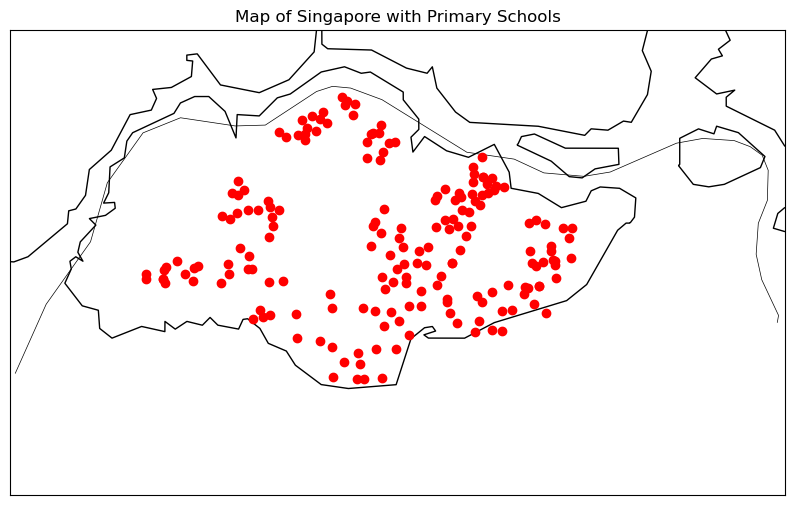

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(10, 8))
m = Basemap(projection='mill', llcrnrlat=1.2, urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104.1, resolution='h')
for index, row in df_primary_school_coordinates.iterrows():
    name = row['name']
    lat = row['latitude']
    lon = row['longitude']
    x, y = m(lon, lat)
    m.scatter(x, y, marker='o', color='r', zorder=5)
m.drawcoastlines()
m.drawcountries()
plt.title('Map of Singapore with Primary Schools')
plt.show()

### Combined Plot

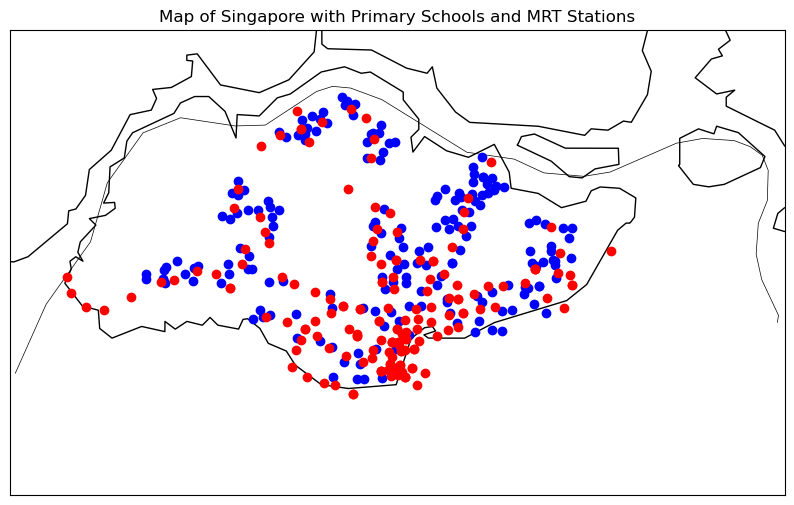

In [13]:

plt.figure(figsize=(10, 8))
m = Basemap(projection='mill', llcrnrlat=1.2, urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104.1, resolution='h')

# Plot primary schools using blue color
for index, row in df_primary_school_coordinates.iterrows():
    name = row['name']
    lat = row['latitude']
    lon = row['longitude']
    x, y = m(lon, lat)
    m.scatter(x, y, marker='o', color='blue', label='Primary Schools', zorder=5)

# Plot MRT stations using red color
for index, row in df_mrt_coordinates_opening_dates.iterrows():
    name = row['name']
    lat = row['latitude']
    lon = row['longitude']
    x, y = m(lon, lat)
    m.scatter(x, y, marker='o', color='red', label='MRT', zorder=5)

m.drawcoastlines()
m.drawcountries()

plt.title('Map of Singapore with Primary Schools and MRT Stations')
plt.show()

## Explore Resale Flat Prices

In [17]:
filename = '/Users/javian/TheCode/Housing-Price-Time-Series-Forecasting/data/ResaleFlatPrices/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv'
df_ResaleflatpricesbasedonregistrationdatefromJan2017onwards = pd.read_csv(filename)

df_ResaleflatpricesbasedonregistrationdatefromJan2017onwards

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
174237,2024-03,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,60 years 04 months,610000.0
174238,2024-03,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,93 years,665000.0
174239,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,62 years 08 months,680000.0
174240,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,62 years 07 months,851888.0


In [19]:
from geopy.distance import geodesic

def find_nearest_mrt(lat, long, mrt_df):
  '''
  Function to find the nearest MRT station
  '''
    min_distance = float('inf')
    nearest_mrt = None
    for index, row in mrt_df.iterrows():
        distance = geodesic((lat, long), (row['latitude'], row['longitude'])).kilometers
        if distance < min_distance:
            min_distance = distance
            nearest_mrt = row['name']
    return nearest_mrt

df_schools_with_nearest_mrt = df_primary_school_coordinates.copy()
df_schools_with_nearest_mrt['nearest MRT'] = df_schools_with_nearest_mrt.apply(
    lambda row: find_nearest_mrt(row['latitude'], row['longitude'], df_mrt_coordinates_opening_dates),
    axis=1
)

print(df_schools_with_nearest_mrt)

                             name  SAP  GEP  Affiliated_Secondary  latitude  \
0        Admiralty Primary School    0    0                     0  1.442635   
1    Ahmad Ibrahim Primary School    0    0                     0  1.433153   
2                  Ai Tong School    1    0                     0  1.360583   
3        Alexandra Primary School    0    0                     0  1.291334   
4     Anchor Green Primary School    0    0                     0  1.390370   
..                            ...  ...  ...                   ...       ...   
180          Yuhua Primary School    0    0                     0  1.342802   
181          Yumin Primary School    0    0                     0  1.351292   
182        Zhangde Primary School    0    0                     0  1.284212   
183       Zhenghua Primary School    0    0                     0  1.379549   
184       Zhonghua Primary School    0    0                     0  1.360203   

      longitude                 nearest MRT  
0    

In [22]:
df_schools_with_nearest_mrt['Town'] = df_schools_with_nearest_mrt['nearest MRT'].str.replace(' MRT Station', '', regex=False).str.upper()

print(df_schools_with_nearest_mrt)

                             name  SAP  GEP  Affiliated_Secondary  latitude  \
0        Admiralty Primary School    0    0                     0  1.442635   
1    Ahmad Ibrahim Primary School    0    0                     0  1.433153   
2                  Ai Tong School    1    0                     0  1.360583   
3        Alexandra Primary School    0    0                     0  1.291334   
4     Anchor Green Primary School    0    0                     0  1.390370   
..                            ...  ...  ...                   ...       ...   
180          Yuhua Primary School    0    0                     0  1.342802   
181          Yumin Primary School    0    0                     0  1.351292   
182        Zhangde Primary School    0    0                     0  1.284212   
183       Zhenghua Primary School    0    0                     0  1.379549   
184       Zhonghua Primary School    0    0                     0  1.360203   

      longitude                 nearest MRT        

In [23]:
print(df_schools_with_nearest_mrt.columns.tolist())

['name', 'SAP', 'GEP', 'Affiliated_Secondary', 'latitude', 'longitude', 'nearest MRT', 'Town']
